In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
def get_number_of_Clusters(df,K,inertia):
  mapping = {}
  for k in K:
    kmeans=KMeans(n_clusters=k,init="k-means++",random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    mapping[k]=kmeans.inertia_
  return mapping

In [3]:
def calculate_silhouette(df,K,silhouette):
  for k in K:
      kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
      kmeans.fit(df)
      silhouette.append(silhouette_score(df,kmeans.labels_))

In [4]:
def plot_elbow(K,inertia):
  plt.figure(figsize=(16,8))
  plt.plot(K,inertia,'bx-')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.title('Elbow Method')
  plt.show()

In [5]:
def label_data_by_clusters(df,features,feature_df,Fit):
  kmeans=KMeans(n_clusters=Fit,init='k-means++',random_state=42)
  kmeans.fit(feature_df)
  df[features]=feature_df
  df['cluster']=kmeans.labels_
  return df,kmeans.cluster_centers_

In [6]:
data = pd.read_csv("/content/drive/MyDrive/Music_mood/data.csv")

In [7]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [8]:
data.describe()


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [9]:
data['name'].value_counts()

,count
name,
Summertime,62
Overture,43
Home,40
Stay,34
You,33
...,...
Granada Arabe,1
Honey Babe Let The Deal Go Down,1
Dos Ojos Negros - Remasterizado,1


In [10]:
data.drop_duplicates(inplace=True,subset=['name'],keep='first')

In [11]:
data.dropna(inplace=True)

In [12]:
data.reset_index(inplace=True,drop=True)

In [13]:
data = data[data['explicit']!=1]

In [14]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132929,0.1990,['CHUNG HA'],0.636,217239,0.8410,0,3As0OA5B06BxLfADvYyG8L,0.000395,2,0.0836,-1.927,0,Stay Tonight,74,2020-04-27,0.0548,121.022,0.5060,2020
132930,0.5920,['Noah Cyrus'],0.618,190183,0.4280,0,0gySkOOewOdZtHG8stPEB8,0.000000,7,0.1920,-8.500,0,Young & Sad,71,2020-05-15,0.0380,142.021,0.3590,2020
132936,0.2100,"['LEGADO 7', 'Junior H']",0.795,218501,0.5850,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,-4.451,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.9340,2020
132938,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020


In [15]:
data['name'].value_counts()

,count
name,
How Would I Know,1
Singende Bataillone 1. Teil,1
"Fantasiestücke, Op. 111: Più tosto lento",1
Chapter 1.18 - Zamek kaniowski,1
Bebamos Juntos - Instrumental (Remasterizado),1
...,...
Chapter 1.3 - Zamek kaniowski,1
Moneda Corriente - Remasterizado,1
Per aspera ad astra,1


In [ ]:
#  popular= pd.DataFrame(data['popularity'].value_counts())

In [ ]:
#  popular

In [16]:
data = data[data['popularity']!=0]

In [17]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
11,0.9890,"['Frédéric Chopin', 'Vladimir Horowitz']",0.170,85133,0.0823,0,6QIONtzbQCbnmWNwn0H1yT,0.911000,10,0.0962,-30.107,0,"Piano Sonata No. 2, Op. 35: IV. Finale. Presto",1,1928,0.0317,85.989,0.3460,1928
40,0.9770,"['Frédéric Chopin', 'Vladimir Horowitz']",0.305,215267,0.0830,0,6duqhjENDYbR2Q4Hpogh9M,0.697000,6,0.2310,-20.895,1,"Nocturne in F-Sharp Major, Op. 15, No. 2",1,1928,0.0331,80.622,0.0479,1928
42,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.337,333907,0.0699,0,6hUMURfCaJ6JB8EWL1ZLr7,0.903000,5,0.1060,-23.806,0,"Nocturne F Minor, Op. 55, No. 1",2,1928,0.0322,72.133,0.1350,1928
47,0.9850,"['Frédéric Chopin', 'Vladimir Horowitz']",0.355,138013,0.0452,0,6j8nMxm9yFxN3Mdodm9tEl,0.825000,1,0.1530,-24.125,1,"Mazurka in F Minor, Op. 7, No. 3",2,1928,0.0329,84.551,0.2760,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132929,0.1990,['CHUNG HA'],0.636,217239,0.8410,0,3As0OA5B06BxLfADvYyG8L,0.000395,2,0.0836,-1.927,0,Stay Tonight,74,2020-04-27,0.0548,121.022,0.5060,2020
132930,0.5920,['Noah Cyrus'],0.618,190183,0.4280,0,0gySkOOewOdZtHG8stPEB8,0.000000,7,0.1920,-8.500,0,Young & Sad,71,2020-05-15,0.0380,142.021,0.3590,2020
132936,0.2100,"['LEGADO 7', 'Junior H']",0.795,218501,0.5850,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,-4.451,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.9340,2020
132938,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020


In [18]:
data.reset_index(inplace=True,drop=True)

In [19]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
1,0.9890,"['Frédéric Chopin', 'Vladimir Horowitz']",0.170,85133,0.0823,0,6QIONtzbQCbnmWNwn0H1yT,0.911000,10,0.0962,-30.107,0,"Piano Sonata No. 2, Op. 35: IV. Finale. Presto",1,1928,0.0317,85.989,0.3460,1928
2,0.9770,"['Frédéric Chopin', 'Vladimir Horowitz']",0.305,215267,0.0830,0,6duqhjENDYbR2Q4Hpogh9M,0.697000,6,0.2310,-20.895,1,"Nocturne in F-Sharp Major, Op. 15, No. 2",1,1928,0.0331,80.622,0.0479,1928
3,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.337,333907,0.0699,0,6hUMURfCaJ6JB8EWL1ZLr7,0.903000,5,0.1060,-23.806,0,"Nocturne F Minor, Op. 55, No. 1",2,1928,0.0322,72.133,0.1350,1928
4,0.9850,"['Frédéric Chopin', 'Vladimir Horowitz']",0.355,138013,0.0452,0,6j8nMxm9yFxN3Mdodm9tEl,0.825000,1,0.1530,-24.125,1,"Mazurka in F Minor, Op. 7, No. 3",2,1928,0.0329,84.551,0.2760,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98655,0.1990,['CHUNG HA'],0.636,217239,0.8410,0,3As0OA5B06BxLfADvYyG8L,0.000395,2,0.0836,-1.927,0,Stay Tonight,74,2020-04-27,0.0548,121.022,0.5060,2020
98656,0.5920,['Noah Cyrus'],0.618,190183,0.4280,0,0gySkOOewOdZtHG8stPEB8,0.000000,7,0.1920,-8.500,0,Young & Sad,71,2020-05-15,0.0380,142.021,0.3590,2020
98657,0.2100,"['LEGADO 7', 'Junior H']",0.795,218501,0.5850,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,-4.451,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.9340,2020
98658,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020


In [40]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,98660.000000,98660.000000,9.866000e+04,98660.000000,98660.0,98660.000000,98660.000000,98660.000000,98660.000000,98660.000000,98660.000000,98660.000000,98660.000000,98660.000000,98660.000000
mean,0.438334,0.533484,2.364051e+05,0.525147,0.0,0.139996,5.196726,0.206669,-10.966264,0.721447,35.463420,0.069715,118.820168,0.542389,1982.212650
std,0.354834,0.171351,1.191709e+05,0.263020,0.0,0.289414,3.504266,0.185743,5.470704,0.448289,17.387948,0.098081,30.305712,0.265201,20.976398
min,0.000000,0.000000,1.470800e+04,0.000000,0.0,0.000000,0.000000,0.000000,-60.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.075000,0.419000,1.737730e+05,0.316000,0.0,0.000000,2.000000,0.095200,-13.733000,0.000000,24.000000,0.033700,95.969750,0.330000,1966.000000
50%,0.397000,0.544000,2.159070e+05,0.529000,0.0,0.000164,5.000000,0.131000,-10.090000,1.000000,36.000000,0.042200,116.560000,0.555000,1982.000000
75%,0.788000,0.657000,2.704670e+05,0.742000,0.0,0.043000,8.000000,0.259000,-6.982000,1.000000,48.000000,0.063000,137.159250,0.766000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,0.0,1.000000,11.000000,1.000000,3.744000,1.000000,97.000000,0.968000,244.091000,1.000000,2020.000000


In [196]:
features = ["acousticness","energy"]

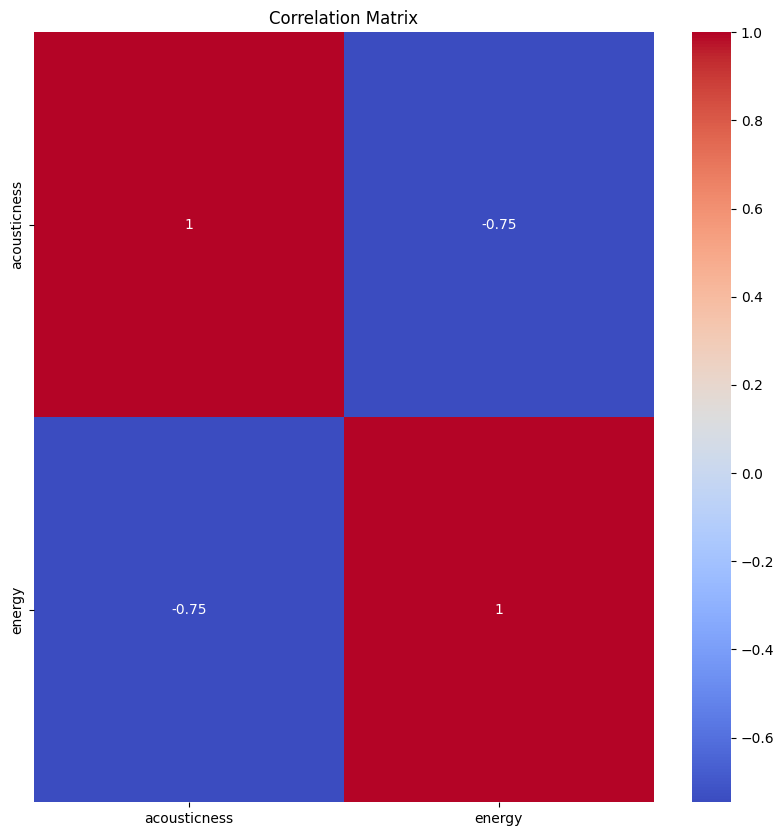

In [197]:
plt.figure(figsize=(10,10))
sns.heatmap(data[features].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [198]:
X=data[features]

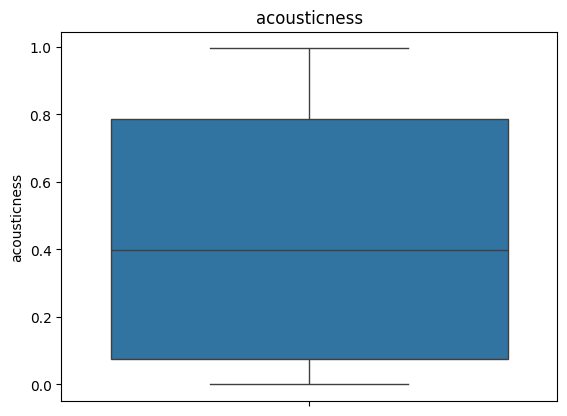

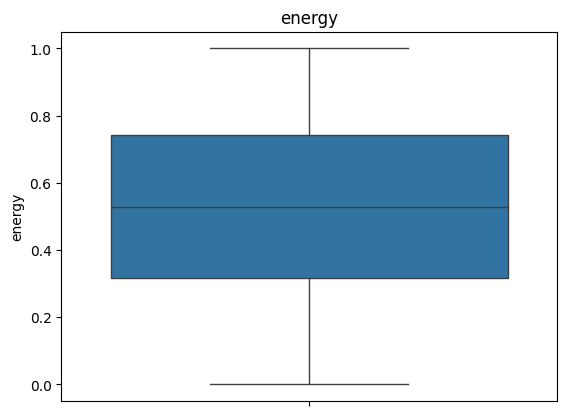

In [199]:
for col in features:
  sns.boxplot(X[col])
  plt.title(col)
  plt.show()

In [163]:
# for col in features:
#   lower = np.percentile(X[col], 10)
#   upper = np.percentile(X[col], 90)
#   X[col] = np.clip(X[col], lower, upper)


In [164]:
# for col in features:
#   sns.boxplot(X[col])
#   plt.title(col)
#   plt.show()

In [200]:
scaler = MinMaxScaler()
X_scaled= scaler.fit_transform(X)

In [201]:
X_scaled

array([[0.9939759 , 0.204     ],
       [0.99297189, 0.0823    ],
       [0.98092369, 0.083     ],
       ...,
       [0.21084337, 0.585     ],
       [0.01676707, 0.385     ],
       [0.54016064, 0.539     ]])

In [202]:
Range=range(2,11)
inertia=[]
silhouette=[]

{2: 5848.0360850341285, 3: 3842.9154980440885, 4: 2771.5746477712974, 5: 2246.898796464906, 6: 1838.0715704895615, 7: 1578.77242679519, 8: 1368.680880103524, 9: 1223.0857125160776, 10: 1122.110536200282}


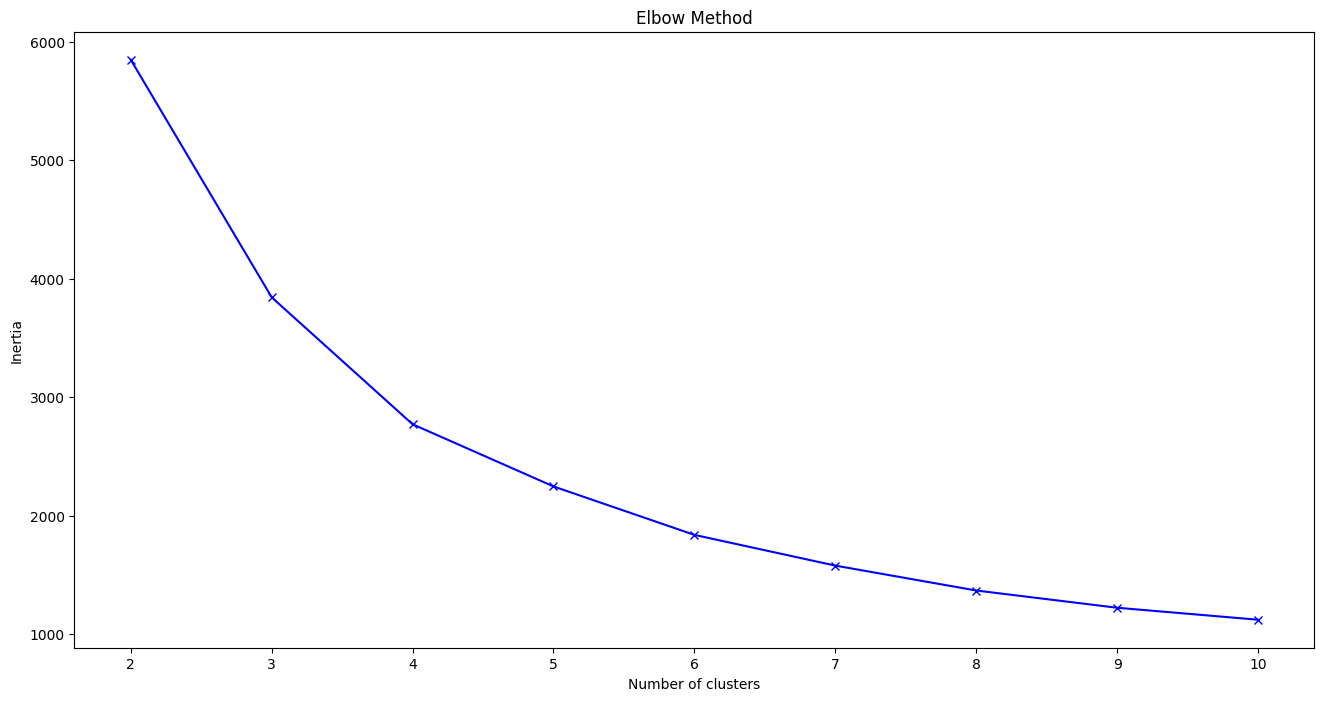

In [203]:
mapping=get_number_of_Clusters(X_scaled,Range,inertia)
print(mapping)
plot_elbow(Range,inertia)


In [204]:
Best_fit=[3]

In [205]:
calculate_silhouette(X_scaled,Best_fit,silhouette)

In [206]:
silhouette

[np.float64(0.47711972155369475)]

In [207]:
fit=3

In [209]:
data,centroids=label_data_by_clusters(data,features,X_scaled,fit)

<ipython-input-5-b957ff5fedce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features]=feature_df
<ipython-input-5-b957ff5fedce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=kmeans.labels_


In [210]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster
0,0.993976,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,1
1,0.992972,"['Frédéric Chopin', 'Vladimir Horowitz']",0.170,85133,0.0823,0,6QIONtzbQCbnmWNwn0H1yT,0.911000,10,0.0962,-30.107,0,"Piano Sonata No. 2, Op. 35: IV. Finale. Presto",1,1928,0.0317,85.989,0.3460,1928,1
2,0.980924,"['Frédéric Chopin', 'Vladimir Horowitz']",0.305,215267,0.0830,0,6duqhjENDYbR2Q4Hpogh9M,0.697000,6,0.2310,-20.895,1,"Nocturne in F-Sharp Major, Op. 15, No. 2",1,1928,0.0331,80.622,0.0479,1928,1
3,0.993976,"['Frédéric Chopin', 'Vladimir Horowitz']",0.337,333907,0.0699,0,6hUMURfCaJ6JB8EWL1ZLr7,0.903000,5,0.1060,-23.806,0,"Nocturne F Minor, Op. 55, No. 1",2,1928,0.0322,72.133,0.1350,1928,1
4,0.988956,"['Frédéric Chopin', 'Vladimir Horowitz']",0.355,138013,0.0452,0,6j8nMxm9yFxN3Mdodm9tEl,0.825000,1,0.1530,-24.125,1,"Mazurka in F Minor, Op. 7, No. 3",2,1928,0.0329,84.551,0.2760,1928,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98655,0.199799,['CHUNG HA'],0.636,217239,0.8410,0,3As0OA5B06BxLfADvYyG8L,0.000395,2,0.0836,-1.927,0,Stay Tonight,74,2020-04-27,0.0548,121.022,0.5060,2020,0
98656,0.594378,['Noah Cyrus'],0.618,190183,0.4280,0,0gySkOOewOdZtHG8stPEB8,0.000000,7,0.1920,-8.500,0,Young & Sad,71,2020-05-15,0.0380,142.021,0.3590,2020,2
98657,0.210843,"['LEGADO 7', 'Junior H']",0.795,218501,0.5850,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,-4.451,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.9340,2020,0
98658,0.016767,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020,0


In [211]:
cluster=data.groupby(by=data['cluster'])

In [212]:
cluster1=cluster.get_group(0)
cluster2=cluster.get_group(1)
cluster3=cluster.get_group(2)

In [220]:
print(data['cluster'].unique())


[1 2 0]


In [213]:
cluster1

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster
36,0.113454,['Ansambl Biljana'],0.582,269267,0.531,0,2Y6iMuaQHRzMCR37ld292x,0.000935,5,0.3850,-6.942,1,Čifte Čifte Pajtonlari,5,1940-11-23,0.0276,133.960,0.840,1940,0
124,0.055221,"['Marika Rossa', 'Alberto Ruiz']",0.754,330000,0.739,0,1IWfs4CgsGq8c75DoKyQzf,0.871000,7,0.1090,-6.333,1,Back To The Old School ( V2 ) - Original Stick,13,1951,0.0636,128.005,0.212,1951,0
207,0.056325,['Django Reinhardt'],0.581,198320,0.448,0,5fH6q9qbVSHgwTPw4e3X44,0.787000,8,0.2080,-10.187,1,Nuages,3,1954-07-19,0.0915,97.630,0.426,1954,0
220,0.081426,['Louie Bellson'],0.451,472893,0.820,0,60nik03QT6IIXyu2sijKsx,0.827000,0,0.4190,-14.182,0,Skin Deep,2,1954-01-01,0.0431,103.205,0.235,1954,0
253,0.199799,['Andre Kostelanetz'],0.617,137693,0.730,0,74HkIfCvs680HfSknIpQfp,0.924000,7,0.6450,-10.657,1,Fools Rush (Where Angels Fear To Tread),2,1954,0.0420,124.298,0.901,1954,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98653,0.173695,"['Jeremy Zucker', 'Chelsea Cutler']",0.358,229205,0.435,0,4yQluMXsIRql36ErBHux2f,0.001060,2,0.0986,-9.198,1,you were good to me - shallou remix,59,2020-06-12,0.0717,155.908,0.336,2020,0
98654,0.049197,"['BRELAND', 'Sam Hunt']",0.753,159889,0.503,0,1akB0Fn6w8U0j2hrDcj1kZ,0.000000,2,0.1500,-6.213,1,My Truck (feat. Sam Hunt) - Remix,66,2020-05-22,0.0406,136.892,0.648,2020,0
98655,0.199799,['CHUNG HA'],0.636,217239,0.841,0,3As0OA5B06BxLfADvYyG8L,0.000395,2,0.0836,-1.927,0,Stay Tonight,74,2020-04-27,0.0548,121.022,0.506,2020,0
98657,0.210843,"['LEGADO 7', 'Junior H']",0.795,218501,0.585,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,-4.451,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.934,2020,0


In [214]:
cluster2

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster
0,0.993976,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,1
1,0.992972,"['Frédéric Chopin', 'Vladimir Horowitz']",0.170,85133,0.0823,0,6QIONtzbQCbnmWNwn0H1yT,0.911000,10,0.0962,-30.107,0,"Piano Sonata No. 2, Op. 35: IV. Finale. Presto",1,1928,0.0317,85.989,0.3460,1928,1
2,0.980924,"['Frédéric Chopin', 'Vladimir Horowitz']",0.305,215267,0.0830,0,6duqhjENDYbR2Q4Hpogh9M,0.697000,6,0.2310,-20.895,1,"Nocturne in F-Sharp Major, Op. 15, No. 2",1,1928,0.0331,80.622,0.0479,1928,1
3,0.993976,"['Frédéric Chopin', 'Vladimir Horowitz']",0.337,333907,0.0699,0,6hUMURfCaJ6JB8EWL1ZLr7,0.903000,5,0.1060,-23.806,0,"Nocturne F Minor, Op. 55, No. 1",2,1928,0.0322,72.133,0.1350,1928,1
4,0.988956,"['Frédéric Chopin', 'Vladimir Horowitz']",0.355,138013,0.0452,0,6j8nMxm9yFxN3Mdodm9tEl,0.825000,1,0.1530,-24.125,1,"Mazurka in F Minor, Op. 7, No. 3",2,1928,0.0329,84.551,0.2760,1928,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98623,0.977912,['Elevie J'],0.155,111522,0.0515,0,0MAXHRBvH3yjPrmaIk0ela,0.952000,10,0.1060,-26.058,1,Wading in dreams,68,2019-09-18,0.0434,71.405,0.0371,2019,1
98626,0.909639,['Camila Cabello'],0.572,228759,0.2920,0,6TRt2bniIq0EIlrDlje7b8,0.000001,7,0.1060,-7.621,1,First Man,71,2019-12-06,0.0364,100.152,0.2230,2019,1
98629,0.894578,['Lennon Stella'],0.440,181533,0.3060,0,15VDHAMS4JCLziCjNkmQl1,0.000000,9,0.1030,-8.947,1,Older Than I Am,69,2020-04-24,0.0363,117.288,0.2010,2020,1
98640,0.976908,['Ellie Goulding'],0.415,207373,0.2620,0,1GofdWoWnV6F7sozQfoE79,0.000003,9,0.1060,-12.530,1,I Know You Care,2,2020-06-12,0.0333,105.861,0.3110,2020,1


In [215]:
cluster3

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster
24,0.386546,['Carl Verheyen'],0.268,121360,0.493,0,57OaX0xwrv3Loj9fxIljeW,0.735000,7,0.452,-8.307,1,Hubcap With Strings,2,1935,0.0354,176.673,0.5510,1935,2
33,0.962851,['Marika Ninou'],0.575,191853,0.941,0,2Tf6tDx5h7aFinn2RfBNWz,0.609000,6,0.300,-10.920,0,Palamakia palamakia,1,1940-01-01,0.1360,170.691,0.5310,1940,2
46,0.240964,['Mina'],0.529,152424,0.521,0,4sGCQ2EI3j0Sztxp2Gi3hT,0.000000,9,0.290,-15.190,1,Stringimi forte i polsi,1,1942-11-13,0.0368,90.312,0.8880,1942,2
57,0.729920,['Stan Kenton'],0.630,194493,0.696,0,5Iq5OflcdJoHgZv9q8FD3n,0.634000,4,0.310,-7.846,0,El Choclo,1,1942-01-01,0.0529,75.809,0.6980,1942,2
58,0.578313,['葛蘭'],0.367,187360,0.243,0,5IxzvnliHO0e849Y0yEysU,0.000000,0,0.265,-11.549,1,將來是個謎,1,1942,0.0530,135.044,0.3490,1942,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98644,0.307229,"['Kygo', 'St. Lundi']",0.535,230233,0.431,0,6LMTqDK4uVR8XsCzel1nkH,0.000000,0,0.101,-8.071,1,To Die For,70,2020-05-29,0.0374,129.797,0.0954,2020,2
98648,0.475904,['Mac Miller'],0.677,298440,0.330,0,2Yv2mHzr5AQavVdwQjEokV,0.000871,2,0.064,-11.198,1,Hand Me Downs,68,2020-01-17,0.1490,68.985,0.3360,2020,2
98651,0.580321,['Taylor Swift'],0.502,296013,0.462,0,3fGnrtrtL1IHSX9t4DKOYf,0.000000,11,0.721,-7.526,1,Cornelia Street - Live From Paris,70,2020-05-18,0.0265,97.085,0.3040,2020,2
98656,0.594378,['Noah Cyrus'],0.618,190183,0.428,0,0gySkOOewOdZtHG8stPEB8,0.000000,7,0.192,-8.500,0,Young & Sad,71,2020-05-15,0.0380,142.021,0.3590,2020,2


In [216]:
centroids

array([[0.08565025, 0.73764126],
       [0.87885157, 0.23412461],
       [0.50626405, 0.51615501]])

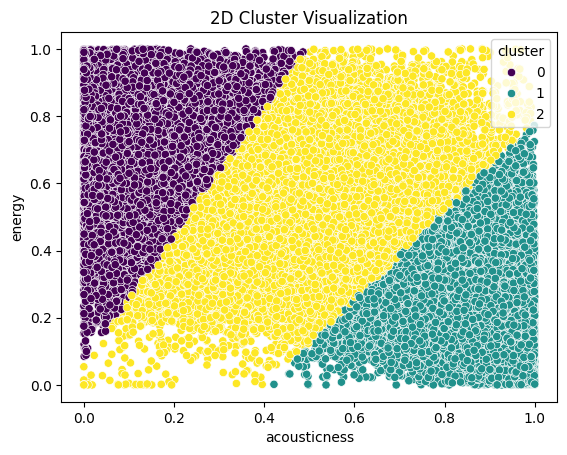

In [222]:
sns.scatterplot(x=data["acousticness"], y=data["energy"], hue=data['cluster'], palette="viridis")
plt.title("2D Cluster Visualization")
plt.show()


In [224]:
mood_mapping = {
    0: "Powerful/Party",
    1: "Chill/Calm",
    2: "Happy/Upbeat"
}

In [225]:
data['cluster']=data['cluster'].map(mood_mapping)

<ipython-input-225-50fada9f1764>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster']=data['cluster'].map(mood_mapping)


In [226]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster
0,0.993976,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,Chill/Calm
1,0.992972,"['Frédéric Chopin', 'Vladimir Horowitz']",0.170,85133,0.0823,0,6QIONtzbQCbnmWNwn0H1yT,0.911000,10,0.0962,-30.107,0,"Piano Sonata No. 2, Op. 35: IV. Finale. Presto",1,1928,0.0317,85.989,0.3460,1928,Chill/Calm
2,0.980924,"['Frédéric Chopin', 'Vladimir Horowitz']",0.305,215267,0.0830,0,6duqhjENDYbR2Q4Hpogh9M,0.697000,6,0.2310,-20.895,1,"Nocturne in F-Sharp Major, Op. 15, No. 2",1,1928,0.0331,80.622,0.0479,1928,Chill/Calm
3,0.993976,"['Frédéric Chopin', 'Vladimir Horowitz']",0.337,333907,0.0699,0,6hUMURfCaJ6JB8EWL1ZLr7,0.903000,5,0.1060,-23.806,0,"Nocturne F Minor, Op. 55, No. 1",2,1928,0.0322,72.133,0.1350,1928,Chill/Calm
4,0.988956,"['Frédéric Chopin', 'Vladimir Horowitz']",0.355,138013,0.0452,0,6j8nMxm9yFxN3Mdodm9tEl,0.825000,1,0.1530,-24.125,1,"Mazurka in F Minor, Op. 7, No. 3",2,1928,0.0329,84.551,0.2760,1928,Chill/Calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98655,0.199799,['CHUNG HA'],0.636,217239,0.8410,0,3As0OA5B06BxLfADvYyG8L,0.000395,2,0.0836,-1.927,0,Stay Tonight,74,2020-04-27,0.0548,121.022,0.5060,2020,Powerful/Party
98656,0.594378,['Noah Cyrus'],0.618,190183,0.4280,0,0gySkOOewOdZtHG8stPEB8,0.000000,7,0.1920,-8.500,0,Young & Sad,71,2020-05-15,0.0380,142.021,0.3590,2020,Happy/Upbeat
98657,0.210843,"['LEGADO 7', 'Junior H']",0.795,218501,0.5850,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,-4.451,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.9340,2020,Powerful/Party
98658,0.016767,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020,Powerful/Party


In [227]:

data.to_csv('/content/drive/MyDrive/Music_mood/clustered_music.csv', index=False)
